# Logistic Regression from Scratch on Car Purchase Data

This project involved recreating the logistic regression algorithm from scratch based on the methodology presented in the YouTube tutorial ["How to implement Logistic Regression from scratch with Python"](https://www.youtube.com/watch?v=YYEJ_GUguHw). The recreated logistic regression model was then applied to ["Cars - Purchase Decision Dataset"](https://www.kaggle.com/datasets/gabrielsantello/cars-purchase-decision-dataset). 

## Dataset

This dataset contains 1000 records of car purchase records, which includes ID, Gender, Age, Annual Salary and Purchase Decision columns. The data from Gender, Age and Annual Salary columns will be used to fit the data to logistic regression function to predict future purchasing decisions based on these metrics. 

Dataset link: https://www.kaggle.com/datasets/gabrielsantello/cars-purchase-decision-dataset

## Additional analysis

In this notebook I added several minor additions to the initial analysis performed on the video from [AssemblyAI Youtube channel](https://www.youtube.com/@AssemblyAI).

- Added an exploratory data analysis for the Cars purchase decision dataset.
- Created a version of sigmoid function that prevents underflow/overflow.
- Applied an oversampling technique to balance the classified instances.
- Compared logistic regression models that used regular and normalized data for training the model.

In [1]:
# Import relevant libraries

# pip install imbalanced-learn
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, datasets
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve
from imblearn.over_sampling import RandomOverSampler

/var/folders/hx/c878nf113fv7h9m8j458sdbh0000gn/T/ipykernel_2631/3859444186.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('car_data.csv')
df = df.drop('User ID', axis = 1) # drop the ID column, as it will not be used for analysis
df

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0
...,...,...,...,...
995,Male,38,59000,0
996,Female,47,23500,0
997,Female,28,138500,1
998,Female,48,134000,1


The data for Gender was converted to binary format, where 0 would represent a male and 1 - female.

In [3]:
# Convert the df['Gender'] into numerical value
# 0 - Male 
# 1 - Female

df['Gender'] = [0 if _ == 'Male' else 1 for _ in df['Gender']]
df['Gender']

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    1
997    1
998    1
999    1
Name: Gender, Length: 1000, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Gender        1000 non-null   int64
 1   Age           1000 non-null   int64
 2   AnnualSalary  1000 non-null   int64
 3   Purchased     1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [5]:
df.describe()

,Gender,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.516000,40.106000,72689.000000,0.402000
std,0.499994,10.707073,34488.341867,0.490547
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,32.000000,46375.000000,0.000000
50%,1.000000,40.000000,72000.000000,0.000000
75%,1.000000,48.000000,90000.000000,1.000000
max,1.000000,63.000000,152500.000000,1.000000


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_ol

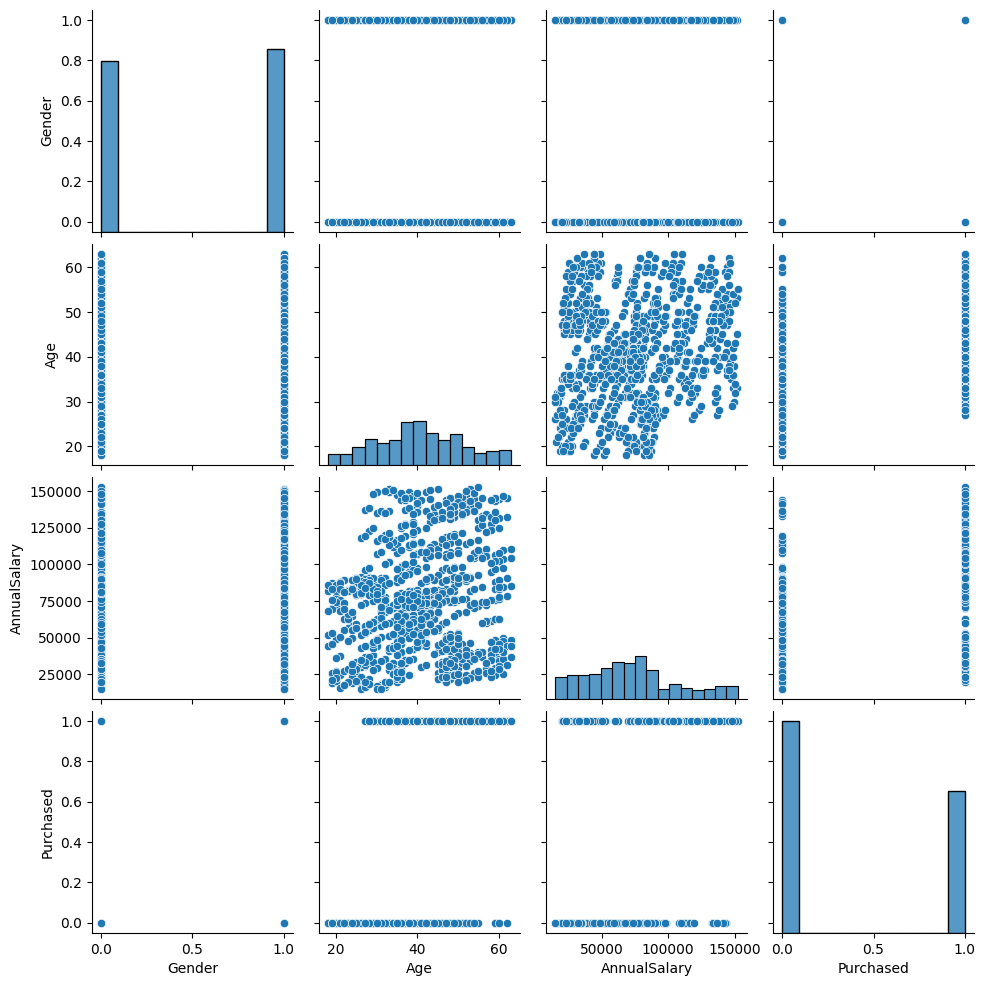

In [6]:
sns.pairplot(df)

The distributions different data columns were plotted below for assessment. All the columns of interest have approximately uniform or equal distributions. 

Male: 48.4 %
Female: 51.6 %


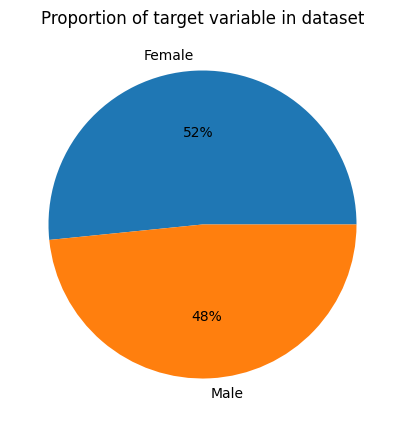

In [7]:
# 0 - Male 
# 1 - Female

print("Male:", (df['Gender'].value_counts()[0]/np.sum(df['Gender'].value_counts())*100).round(2), "%")
print("Female:", (df['Gender'].value_counts()[1]/np.sum(df['Gender'].value_counts())*100).round(2), "%")

plt.figure(figsize=(5,5))
plt.pie(df["Gender"].value_counts().values,labels=["Female","Male"], autopct="%1.0f%%")
plt.title("Proportion of target variable in dataset")
plt.show()

Not Purchased: 598
Purchased: 402
Not Purchased: 59.8 %
Purchased: 40.2 %


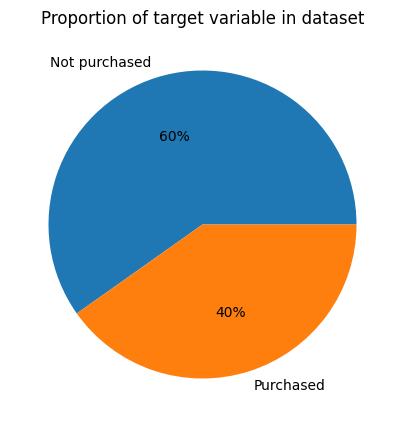

In [8]:
print("Not Purchased:", (df['Purchased'].value_counts()[0]))
print("Purchased:", (df['Purchased'].value_counts()[1]))

print("Not Purchased:", (df['Purchased'].value_counts()[0]/np.sum(df['Purchased'].value_counts())*100).round(2), "%")
print("Purchased:", (df['Purchased'].value_counts()[1]/np.sum(df['Purchased'].value_counts())*100).round(2), "%")

plt.figure(figsize=(5,5))
plt.pie(df["Purchased"].value_counts().values,labels=["Not purchased","Purchased"], autopct="%1.0f%%")
plt.title("Proportion of target variable in dataset")
plt.show()

The salary data doesn't resemble any particular distribution. However, there is a visible peak at approximately 75.000 mark, with the mode being at 81.500 mark.

Mode of the distribution: 0    81500
Name: AnnualSalary, dtype: int64


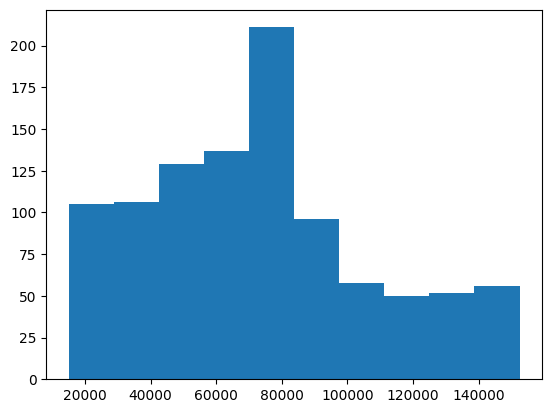

In [9]:
plt.hist(df['AnnualSalary'], bins =  10)

print('Mode of the distribution:', df['AnnualSalary'].mode())

In [10]:
# Now we will build the Logistic Regression from scratch

# Define sigmoid function in a way to prevent underflow/overflow

def sigmoid(x):
    pos_mask = x >= 0 # Create a mask where the 'x' is greater than or equal to 0 and will output 'True'
    neg_mask = ~pos_mask # Create a mask where the 'x' is less than 0 and will output 'False'
    result = np.empty_like(x, dtype=float) # Create empty array later to be filled with sigmoid values

    result[pos_mask] = 1 / (1 + np.exp(-x[pos_mask])) # Define sigmoid functions for both positive and negative x to prevent underflow/overflow
    exp_x = np.exp(x[neg_mask])
    result[neg_mask] = exp_x / (1 + exp_x)

    return result

class LogisticRegression():
    def __init__(self, lr = 0.001, n_iter = 1000): # Initiate all relevant parameters that would be needed to create the model
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape # define the amount of samples and features based on the shape of the training data (X)
        self.weights = np.zeros(n_features) # create initial weights (0) for every feature in the dataset 
        self.bias = 0 # there will only be 1 bias in the model, set it to 0

        for _ in range(self.n_iter): # this cycle continiously updates weights for every parameters for specified number of iterations
            linear_pred = np.dot(X, self.weights) + self.bias # linear predictions are created and then fitted into the sigmoid function
            predictions = sigmoid(linear_pred) 

            # compute the weights and bias
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))  # this comes from a derivative of a log loss function w.r.t. to weights
            db = (1 / n_samples) * np.sum(predictions - y)

            # update weights and bias, after which cycle repeats again
            self.weights -= self.lr * dw 
            self.bias -= self.lr * db

    def predict(self, X): # after these iterations cycle repeats for 1 more time, after which it converts the answer to binary classification
        linear_pred = np.dot(X, self.weights) + self.bias
        predictions = sigmoid(linear_pred)
        result = [0 if y <= 0.5 else 1 for y in predictions]
        return result

The accuracy metric is the same as in the video tutorial, which means it should work correctly and we can then apply it to the car purchase decision dataset.

In [11]:
# Check the model's assessment on the breast cancer dataset

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

clf = LogisticRegression(lr = 0.01)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test)/len(y_test)

acc = accuracy(y_pred, y_test)
print('Accuracy:', acc)

Accuracy: 0.9210526315789473


The assesment of the model will be conducted based on the following metrics: 
- Confusion Matrix: a table used to evaluate the performance of a classification model by displaying the counts of true positives, true negatives, false positives, and false negatives.
- Accuracy: the proportion of correctly predicted instances (both true positives and true negatives) out of the total instances.
- Precision: the proportion of true positive predictions out of all positive predictions made by the model.
- Recall: Recall is the proportion of true positive predictions among all actual positive cases.
- F1 Score: the harmonic mean of precision and recall, providing a single metric that balances both aspects of a model's performance.

After fitting the logistic regression to the car data, the accuracy of 62.5% was achieved, which could be considered a rather bad performance as the model has only 12.5% advantage over randomly guessing. By looking at the confusion matrix, we could see that the values of accuracy matrix are only located in the left column, which means that all values are classified as positive, and that's where the poor performance of the model comes from. Every time the model makes a prediction that the car will be purchased. The precision and recall metrics couldn't be calculated as there are no values for False Positives and True Negatives, as the model only made predictions for positive values.

In [12]:
# Let's test the model

model = LogisticRegression(lr=0.5) 
X_train, X_test, y_train, y_test = train_test_split(df[['Gender', 'Age', 'AnnualSalary']].astype(float), df['Purchased'].astype(float), test_size=0.2, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Confusion matrix:')
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print("Accuracy:", accuracy(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred).round(3))

Confusion matrix:
[[125   0]
 [ 75   0]]
Accuracy: 0.625
Precision: 0.0
Recall: 0.0
F1 score: 0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The model assigns only positive values to predictions, which is not good. The issue may stem from the fact that our dataset is imbalanced, and model prefers to just make predictions for the prevalent class. Let's perform random oversampling using imbalanced-learn library, where model takes random instances from the class with fewer instances and appends them to the dataset until the classes are balanced.

In [13]:
oversample = RandomOverSampler(sampling_strategy = 'minority') # perform oversampling technique 
X_over, y_over = oversample.fit_resample(X_train, y_train) # chooses purchase instances randomly and appends them to same dataset in order to balance classes

print('Purchase instances added:', X_over.shape[0] - X_train.shape[0]) # added 146 purchase instances randomly
print("Not Purchased:", (y_over.value_counts()[0]))
print("Purchased:", (y_over.value_counts()[1]))

Purchase instances added: 146
Not Purchased: 473
Purchased: 473


After fitting the model on the balanced dataset, we can see that the issue stems not from the imbalanced instances of classes, as the model still makes predictions for 1 class.

In [14]:
model = LogisticRegression(lr=1.5)
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_over.astype(float), y_over.astype(float), test_size=0.2, random_state=1)
model.fit(X_train_o, y_train_o)
y_pred_o = model.predict(X_test_o)

print('Confusion matrix:')
confusion_matrix = metrics.confusion_matrix(y_test_o, y_pred_o)
print(confusion_matrix)
print("Accuracy:", accuracy(y_test_o, y_pred_o))
print("Precision:", precision_score(y_test_o, y_pred_o))
print("Recall:", recall_score(y_test_o, y_pred_o))
print("F1 score:", f1_score(y_test_o, y_pred_o).round(3))

Confusion matrix:
[[94  0]
 [96  0]]
Accuracy: 0.49473684210526314
Precision: 0.0
Recall: 0.0
F1 score: 0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Other possible root of this issue may be the imbalanced value range of the data in different columns. For example, the Gender column has values between 0 and 1, the Age column has values between 18 and 63 and the AnnualSalary column has values between 15000 and 152500. The model may give the preference to the columns with values which have larger range (Annual Salary in this case) due to faster weights convergence, which in turn would cause the imbalance inside the model's weights. 

To tackle this issue, we need to have approximately similar ranges for all the columns. One way to do it is to use a Min-Max normalization on the data. In Min-Max normalization, the current value inside the column is subtracted value from the minimum value and then divided by the difference between maximum and minimum values inside this column. This way, all the data inside the columns will now be in range between 0 and 1, and there would be no disbalance between model's weights. 

Let's see if there is any difference in the model's performance.

In [15]:
# Define Min-Max normalization function, which will be used to normalize columns with numerical values
def min_max_normalize(column):
    return (column - column.min()) / (column.max() - column.min())

# Normalize 'Age' and 'AnnualSalary' columns
df['Age'] = min_max_normalize(df['Age'])
df['AnnualSalary'] = min_max_normalize(df['AnnualSalary'])

As can be seen, the data is now normalized.

In [16]:
df.describe() 

,Gender,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.516000,0.491244,0.419556,0.402000
std,0.499994,0.237935,0.250824,0.490547
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.311111,0.228182,0.000000
50%,1.000000,0.488889,0.414545,0.000000
75%,1.000000,0.666667,0.545455,1.000000
max,1.000000,1.000000,1.000000,1.000000


After testing the model again, we got the model which seems to work correctly with healthy looking confusion matrix, accuracy of 85.5%, precision of 84.8%, recall of 74.6% and F1 score of 0.794. These metrics may be considered good, as the model will incorrectly classify in only 14.5% of times and indicate the good overall performance of the model.

In [17]:
model = LogisticRegression(lr=1.5)
X_train, X_test, y_train, y_test = train_test_split(df[['Gender', 'Age', 'AnnualSalary']].astype(float), df['Purchased'].astype(float), test_size=0.2, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Confusion matrix:')
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print("Accuracy:", accuracy(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred).round(3))
print("Recall:", recall_score(y_test, y_pred).round(3))
print("F1 score:", f1_score(y_test, y_pred).round(3))

Confusion matrix:
[[115  10]
 [ 19  56]]
Accuracy: 0.855
Precision: 0.848
Recall: 0.747
F1 score: 0.794


## Conclusion

This project successfully implemented logistic regression from scratch and applied it to the car purchase dataset. The exploratory data analysis and the evaluation of the impact of normalization on model performance helped understand the distribution of data based on which predictions would be made, as well as to check if it was balanced. After the exploratory data analysis, the logistic regression was implemented from scratch and its performance assessed based on accuracy, precision, recall and F1 score metrics. 

Initial model exhibited poor performance metrics with accuracy of 62.5%, which can be considered low and only 12.5% better than random guessing. By looking at the confusion matrix, it was found that the model predicted only prevalent class of the dataset. The possible cause of this problem was then explored, which could have been inbalanced classes in the dataset. By using the oversampling technique, the instances from the minority class were then duplicated and added to the dataset in order to make it balanced. However, after balancing the dataset, the model performance remained roughly the same. 

After the normalization technique was applied to the initial dataset, the model gained optimal performance with following metrics: accuracy of 85.5%, precision of 84.8%, recall of 74.6% and F1 score of 0.794. This is due to the fact that data ranges in different columns differed drastically, which influenced convergence of the weights for the class with the highest numeric ranges.

Future work could explore other techniques such as more feature engineering and the application of different classification algorithms to further enhance model performance.